In [3]:
%pylab inline
# import nidaqmx

Populating the interactive namespace from numpy and matplotlib


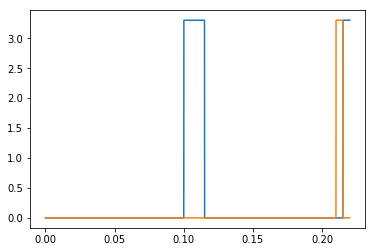

In [9]:
RATE = 800e3
s = RATE
ms = RATE / 1e3
us = RATE / 1e6


ON = [3.3]
OFF = [0]

Pavg = 0.1

Theat = 15*ms
Tring = 100*ms
Tmeas = 10*ms

Tcool = (Theat + Tmeas) / Pavg - Tring

Tpretrig = 5*ms
Ttrigon = 5*ms

wave_aom = [
    OFF * int(Tcool),
    ON * int(Theat),
    OFF * int(Tring),
    ON * int(Tmeas),
]

wave_aom = hstack(wave_aom)

wave_trig = [
    OFF * int(Tcool + Theat + Tring - Tpretrig),
    ON * int(Ttrigon),
    OFF * int(Tmeas + Tpretrig - Ttrigon),
]
wave_trig = hstack(wave_trig)


figure()
ts = arange(len(wave_aom)) / RATE
plot(ts, wave_aom)
plot(ts, wave_trig)

# xlim(.05, 0.11)

In [6]:
mean(wave_aom) / 3.3

0.0099009900990099

In [3]:
# create and configure nidaq task
DEV = "Dev2"
CHAN_AOM = "ao0"
CHAN_TRIG = "ao1"
VMAX = 5.



outtask = nidaqmx.Task()

outtask.ao_channels.add_ao_voltage_chan(
    f"/{DEV}/{CHAN_AOM},/{DEV}/{CHAN_TRIG}", 
    min_val=-VMAX, max_val=VMAX)

outtask.timing.cfg_samp_clk_timing(
    rate=RATE, 
    samps_per_chan=len(wave_aom),
    sample_mode=nidaqmx.constants.AcquisitionType.CONTINUOUS)

outtask.write([list(wave_aom), list(wave_trig)], timeout=10, auto_start=True)

88000

In [4]:
wave_aom

array([0. , 0. , 0. , ..., 3.3, 3.3, 3.3])

In [5]:
len(wave_aom), len(wave_trig)

(94600, 94600)